In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra

In [3]:
ctx = straxbra.XebraContext()
run = '00054'
peaks_data_xebra = ctx.get_array(run, 'peaks')
ncomp = ctx.get_array(run, 'n_competing')
event_basics = ctx.get_array(run, 'event_basics')
records_data = ctx.get_array(run, 'records')
raw_records_data = ctx.get_array(run, 'raw_records')
ctx.data_info('peaks')
# ctx.data_info('n_competing')
# ctx.data_info('event_basics')

/software/straxbra/straxbra/plugins.py:372: RuntimeWarning: invalid value encountered in true_divide
  return LRF_PMTs_array / (np.sum(LRF_PMTs_array))
/software/straxbra/straxbra/plugins.py:377: RuntimeWarning: divide by zero encountered in true_divide
  reconstruct = lambda x: np.sum(((self.LRF_PMTs(x[0], x[1]) - HFs_input)**2) / (self.LRF_PMTs(x[0], x[1])))
/software/straxbra/straxbra/plugins.py:377: RuntimeWarning: invalid value encountered in true_divide
  reconstruct = lambda x: np.sum(((self.LRF_PMTs(x[0], x[1]) - HFs_input)**2) / (self.LRF_PMTs(x[0], x[1])))


,Field name,Data type,Comment
0,channel,int16,Channel/PMT number
1,dt,int16,Time resolution in ns
2,time,int64,Start time of the interval (ns since unix epoch)
3,length,int32,Length of the interval in samples
4,area,float32,Integral across channels in photoelectrons
5,area_per_channel,"('<f4', (8,))",Integral per channel in PE
6,n_hits,int32,Number of hits from which peak was constructed...
7,data,"('<f4', (200,))",Waveform data in PE/sample (not PE/ns!)
8,width,"('<f4', (11,))",Peak widths in ns: range of central area fraction
9,area_decile_from_midpoint,"('<f4', (11,))",Peak widths in ns: area from midpoint


In [4]:
integral = peaks_data_xebra['time']



In [5]:
ctx.data_info('n_competing')

,Field name,Data type,Comment
0,n_competing,int32,Number of nearby larger or slightly smaller peaks


In [6]:
ctx.data_info('event_basics')

,Field name,Data type,Comment
0,n_peaks,int32,Number of peaks in the event
1,drift_time,int64,Drift time between main S1 and S2 in ns
2,s1_index,int32,Main S1 peak index
3,s1_area,float32,"Main S1 area (PE), uncorrected"
4,s1_area_b,float32,"Main S1 area (PE), uncorrected, bottom PMTs only"
5,s1_area_fraction_top,float32,Main S1 area fraction top
6,s1_range_50p_area,float32,"Main S1 width (ns, 50% area)"
7,s1_n_competing,int32,Main S1 number of competing peaks
8,s2_index,int32,Main S2 peak index
9,s2_area,float32,"Main S2 area (PE), uncorrected"


In [7]:
ctx.data_info('records')

,Field name,Data type,Comment
0,channel,int16,Channel/PMT number
1,dt,int16,Time resolution in ns
2,time,int64,Start time of the interval (ns since unix epoch)
3,length,int32,Length of the interval in samples
4,area,int32,Integral in ADC x samples
5,pulse_length,int32,Length of pulse to which the record belongs (w...
6,record_i,int16,Fragment number in the pulse
7,baseline,float32,Baseline in ADC counts. data = int(baseline) -...
8,reduction_level,uint8,Level of data reduction applied (strax.Reducti...
9,data,"('<i2', (110,))",Waveform data in ADC counts above baseline


In [8]:
S1_area = event_basics['s1_area']
S2_area = event_basics['s2_area']

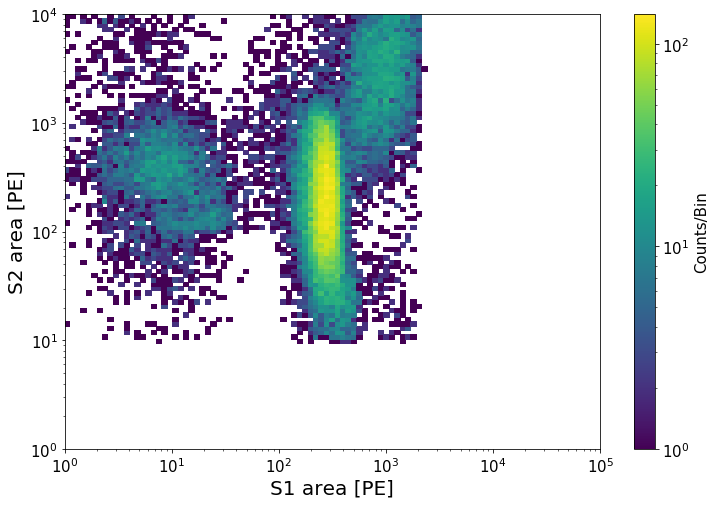

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

bins_x = np.logspace(0,5,100)
bins_y = np.logspace(0,4,100)
histo_max= 2*10**3

counts, _, _ = np.histogram2d(S1_area, S2_area, bins=(bins_x, bins_y))

im = ax.pcolormesh(bins_x, bins_y, counts.T, cmap='viridis', norm=mcolors.LogNorm())
ax.set_xlabel('S1 area [PE]', fontsize = 20)
ax.set_ylabel('S2 area [PE]', fontsize = 20)

#ax.set_title(' xxx', fontsize= 15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_xscale('log')
ax.set_yscale('log')
cbar = plt.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(label ='Counts/Bin', fontsize=15)

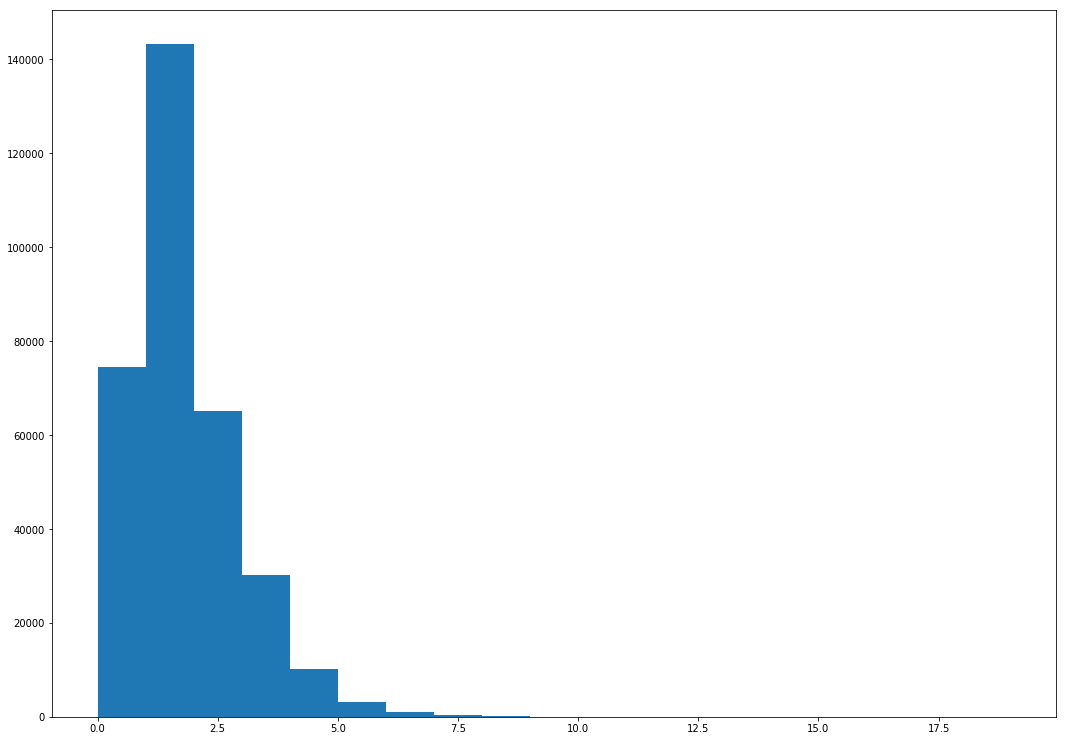

In [10]:
plt.figure(figsize=(18,13))
plt.hist(ncomp['n_competing'], bins=np.arange(20))
plt.show()

[37.29  5.95 40.99 ... 16.77  0.    0.  ]


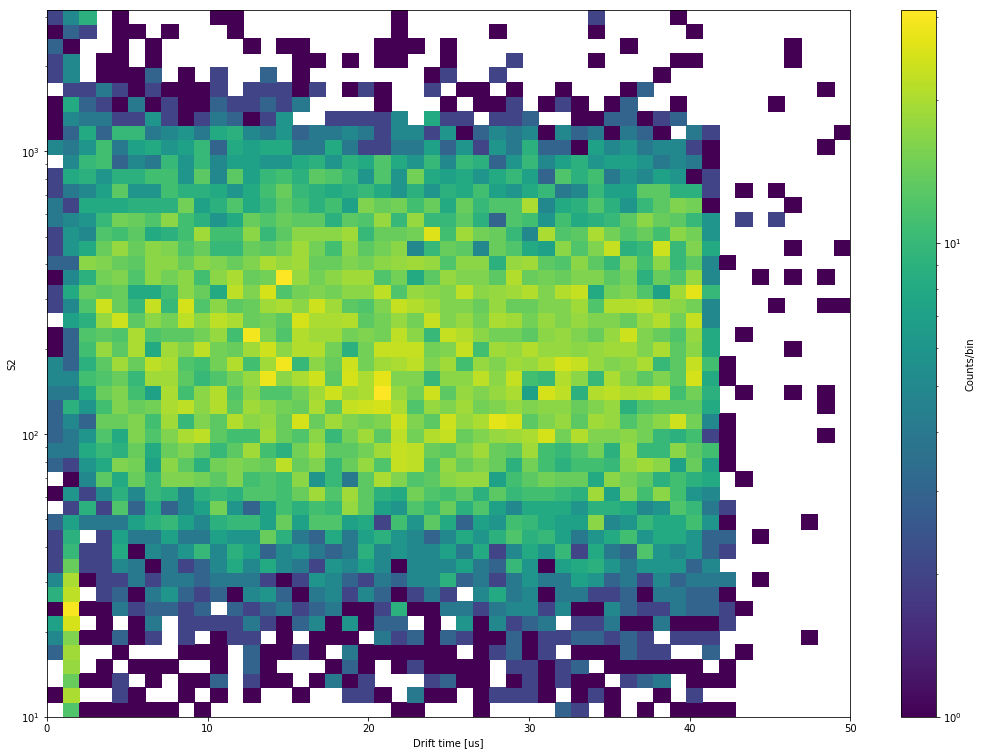

In [11]:
line = event_basics[(200<event_basics['s1_area']) & (event_basics['s1_area'] < 400)]
fig, ax = plt.subplots(figsize=(18,13))

bins_x = np.linspace(0,50,50)
bins_y = np.logspace(1,3.5,50)
counts, xedges, yedges = np.histogram2d(line['drift_time']/1e3, line['s2_area'], bins=(bins_x, bins_y))
print(line['drift_time']/1e3)
im = ax.pcolormesh(bins_x, bins_y, counts.T, norm=LogNorm())
plt.colorbar(im,ax=ax, label='Counts/bin')
ax.set_yscale('log')

ax.set_xlabel('Drift time [us]')
ax.set_ylabel('S2')
plt.show()

In [12]:
counts[0]

array([0., 1., 0., 0., 3., 5., 7., 1., 9., 5., 2., 2., 2., 3., 0., 1., 0.,
       3., 4., 3., 3., 3., 4., 5., 5., 1., 1., 0., 2., 2., 1., 3., 2., 2.,
       4., 4., 2., 2., 0., 5., 1., 1., 1., 0., 2., 2., 3., 1., 2.])

In [13]:
bins_y

array([  10.        ,   11.24657822,   12.64855217,   14.22529313,
         15.9985872 ,   17.99293623,   20.23589648,   22.75845926,
         25.59547923,   28.78615592,   32.37457543,   36.41031949,
         40.94915062,   46.05378256,   51.79474679,   58.25136712,
         65.51285569,   73.6795456 ,   82.86427729,   93.19395762,
        104.81131342,  117.87686348,  132.57113656,  149.09716572,
        167.68329368,  188.58632788,  212.09508879,  238.53440064,
        268.26957953,  301.71148105,  339.32217719,  381.62134079,
        429.19342601,  482.69574377,  542.86754393,  610.54022966,
        686.648845  ,  772.24499458,  868.51137375,  976.77811009,
       1098.54114199, 1235.48288826, 1389.49549437, 1562.70697655,
       1757.51062485, 1976.5980717 , 2222.99648253, 2500.11038262,
       2811.76869797, 3162.27766017])

In [14]:
#xcenter.shape

In [15]:
#yedges

In [16]:
xcenter = ((xedges[:-1]+xedges[1:])/2)
ycenter = ((yedges[:-1]+yedges[1:])/2)

[209.38524762502874, 227.45036029166158, 190.32878329538468, 209.7515027810948, 205.3533195162781, 178.64071063397225, 196.8693027844175, 193.61284610160263, 198.0174038827113, 215.6756992588929, 207.84744368714465, 191.79972057377813, 198.0881591499256, 193.34259812212264, 172.7251343468337, 192.88234018633125, 177.91904236281115, 184.89794140835085, 202.4844832476081, 166.8807000631797, 200.32079132639146, 169.36110596127972, 178.22923516054814, 183.22365980105428, 181.49853790228738, 170.98665127554938, 187.41375554968494, 199.97565172549986, 177.01000667257443, 192.22685743757924]
[14.499249641510168, 17.377358848777032, 10.992066276673546, 13.366591411321918, 14.523475853769334, 9.9554684978763, 13.372669185975852, 11.22258456631179, 10.742282385829991, 17.186519928050323, 11.061681515871744, 9.334328111088084, 10.942743772695351, 13.378916626378222, 8.859185910107866, 11.677088478421728, 9.154092354461174, 13.098870968221066, 15.571664683796632, 7.954326732476899, 10.244754763031

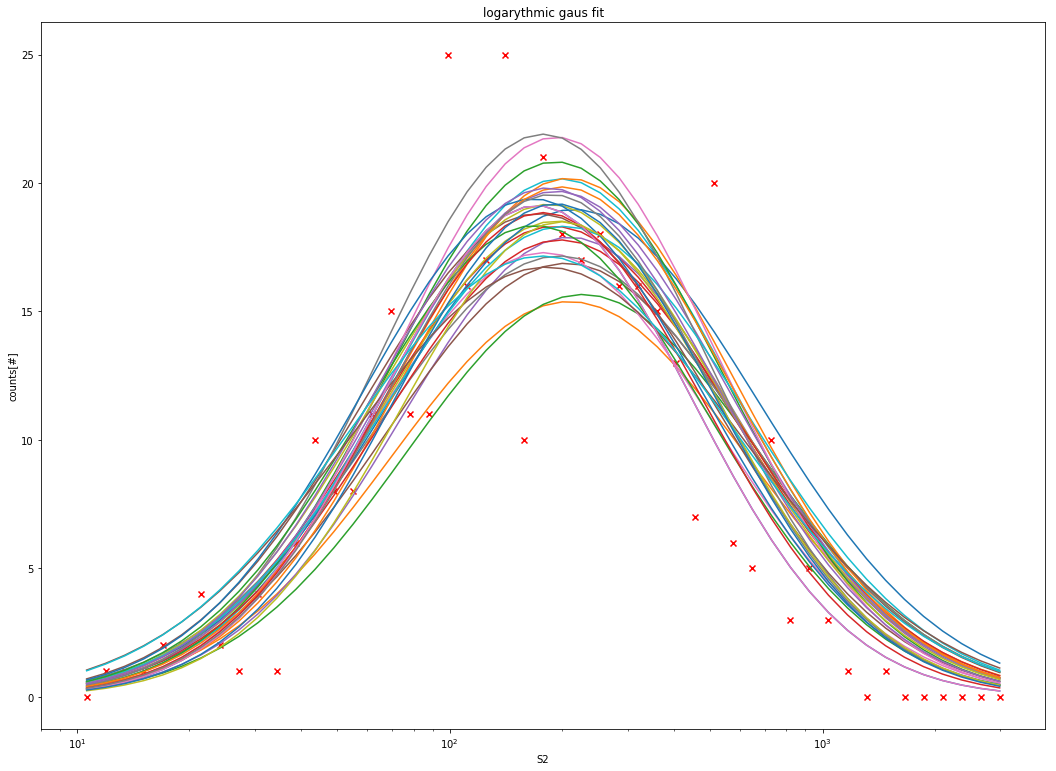

In [17]:
fig, ax = plt.subplots(figsize=(18,13))
plt.scatter(ycenter, counts[30], c = 'r', marker = 'x')
ax.set_xscale('log')


def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(np.log(x)-mu)**2         /(2*sigma**2))
    return gaus
p0 = [35,400,250]
# bin_mask = bincenters[20:]
# n_mask = n[20:]
mu_list = []
mu_error_list = []
popt, pcov = curve_fit(single_gaus, ycenter, counts[30], p0)
plt.plot(ycenter, single_gaus(ycenter, *popt))
ax.set_title('logarythmic gaus fit')
ax.set_xlabel('S2')
ax.set_ylabel('counts[#]')
for i in range(5,35):   
    popt, pcov = curve_fit(single_gaus, ycenter, counts[i], p0)
    plt.plot(ycenter, single_gaus(ycenter, *popt))
    value = np.exp(popt[1])
    mu_list.append(value)
    perr = np.sqrt(np.diag(pcov))
    error_ln_mu = perr[1]
    error_mu = np.exp(popt[1])*error_ln_mu
    mu_error_list.append(error_mu)
    
print(mu_list)
print(mu_error_list)

# print(popt)
# print( np.exp(popt[1])) 
# print(np.exp(perr[1]))
# mu = (np.exp(popt[1]))
# perr = np.sqrt(np.diag(pcov))
# error_ln_mu = perr[1]
# error_mu = np.exp(popt[1])*error_ln_mu
# # print(popt)
# # print(perr)
# print('mu = ', mu, '+/- ', error_mu )
# plt.plot(bincenters,single_gaus(bincenters,*popt))                
# popt, pcov = curve_fit(single_gaus, bin_mask, n_mask, p0,  sigma=np.maximum(np.sqrt(n_mask), np.ones_like(n_mask)))
# plt.plot(bin_mask,single_gaus(bin_mask,*popt))
plt.show()




In [18]:
print(counts[30])


[ 0.  1.  1.  1.  2.  2.  4.  2.  1.  4.  1.  6. 10.  8.  8. 11. 15. 11.
 11. 25. 16. 17. 25. 10. 21. 18. 17. 18. 16. 16. 15. 13.  7. 20.  6.  5.
 10.  3.  5.  3.  1.  0.  1.  0.  0.  0.  0.  0.  0.]


this is lamba:  0.003803621866995427
this is 1/lamba:  262.90731175912714
[14.499249641510168, 17.377358848777032, 10.992066276673546, 13.366591411321918, 14.523475853769334, 9.9554684978763, 13.372669185975852, 11.22258456631179, 10.742282385829991, 17.186519928050323, 11.061681515871744, 9.334328111088084, 10.942743772695351, 13.378916626378222, 8.859185910107866, 11.677088478421728, 9.154092354461174, 13.098870968221066, 15.571664683796632, 7.954326732476899, 10.244754763031882, 9.023264591908257, 9.687929948568055, 8.98864550380107, 14.887892394548478, 9.849496983773916, 8.363040167524657, 10.80763296612842, 13.390969061430829, 9.471099040874]
electron lifetime:  262.90731175912714 +/- 85.53071557070037


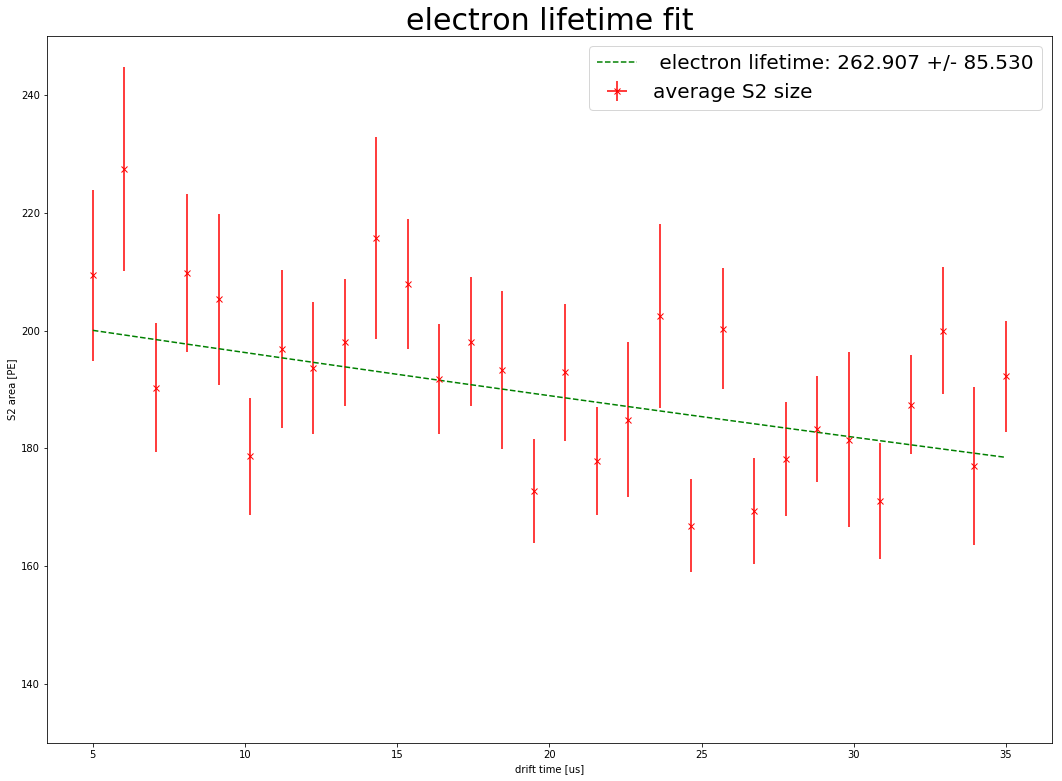

In [19]:
def expo(x, a, b):
    return a*np.exp(-b*x)

fig, ax =plt.subplots(figsize = (18,13))
p0=  [10,0.1]
x = np.linspace(5,35,30)
y_values = mu_list
y_error = mu_error_list

SIZE = 20
EXTRA_SIZE = 30

plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=EXTRA_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)

popt, pcov = curve_fit(expo, x, y_values, sigma=y_error, p0=p0, absolute_sigma=True)
plt.errorbar(x, y_values, yerr=y_error, xerr=0, fmt = 'rx', label = 'average S2 size' )

print('this is lamba: ', popt[1])
print('this is 1/lamba: ', 1/popt[1] )
plt.plot(x, expo(x, *popt), 'g--', label = ' electron lifetime: 262.907 +/- 85.530')
print(y_error)

perr = np.sqrt(np.diag(pcov))
ax.set_ylim([130,250])
ax.set_title('electron lifetime fit')
ax.set_xlabel('drift time [us]')
ax.set_ylabel('S2 area [PE]')

lifetime = 1/popt[1]
lifetime_error = (1/(popt[1]**2))*perr[1]
print('electron lifetime: ', lifetime, '+/-', lifetime_error)
# print(perr)
plt.legend(prop={'size': 20})
plt.show()

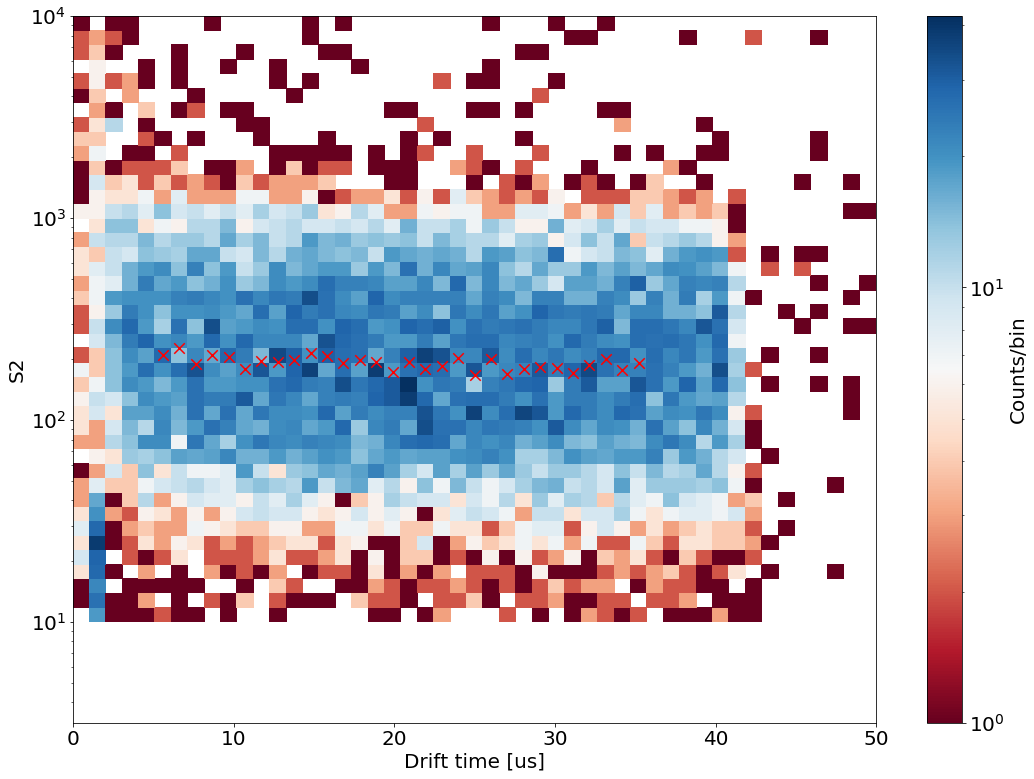

In [20]:
line = event_basics[(200<event_basics['s1_area']) & (event_basics['s1_area'] < 400)]
fig, ax = plt.subplots(figsize=(18,13))

bins_x = np.linspace(0,50,50)
bins_y = np.logspace(0.5,4,50)
counts, xedges, yedges = np.histogram2d(line['drift_time']/1e3, line['s2_area'], bins=(bins_x, bins_y))

im = ax.pcolormesh(bins_x, bins_y, counts.T, norm=LogNorm(), cmap = 'RdBu')
plt.colorbar(im,ax=ax, label='Counts/bin')

plt.scatter(xcenter[5:35], y_values, c = 'r', marker = 'x', s =110)

ax.set_yscale('log')

ax.set_xlabel('Drift time [us]')
ax.set_ylabel('S2')
plt.show()

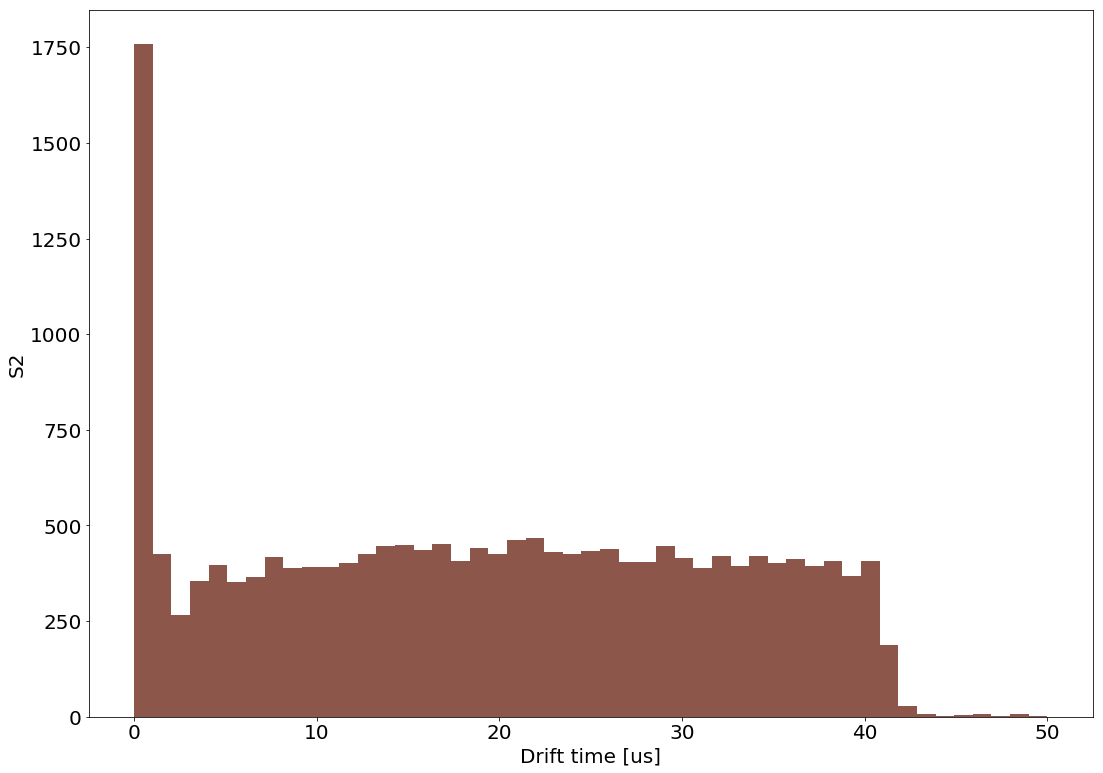

In [21]:
line = event_basics[(200<event_basics['s1_area']) & (event_basics['s1_area'] < 400)]
fig, ax = plt.subplots(figsize=(18,13))

bins_x = np.linspace(0,50,50)
#bins_y = np.logspace(1,3.5,50)
counts, binEdges = np.histogram(line['drift_time']/1e3, bins=bins_x)

#ax.set_yscale('log')
plt.hist(line['drift_time']/1e3, bins=bins_x, color='C5')
ax.set_xlabel('Drift time [us]')
ax.set_ylabel('S2')
plt.show()